# Kmeans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import os
os.environ["OMP_NUM_THREADS"] = "8"

from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from kneed import KneeLocator

In [2]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [3]:
df = pd.read_csv("test_cleaned.csv")

In [4]:
df = df.replace({"explicit": {False:0, True:1}})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5000 non-null   object 
 1   duration_ms       5000 non-null   int64  
 2   explicit          5000 non-null   int64  
 3   popularity        5000 non-null   int64  
 4   artists           5000 non-null   object 
 5   album_name        5000 non-null   object 
 6   danceability      5000 non-null   float64
 7   energy            5000 non-null   float64
 8   key               5000 non-null   int64  
 9   loudness          5000 non-null   float64
 10  speechiness       5000 non-null   float64
 11  acousticness      5000 non-null   float64
 12  instrumentalness  5000 non-null   float64
 13  liveness          5000 non-null   float64
 14  valence           5000 non-null   float64
 15  tempo             5000 non-null   float64
 16  time_signature    5000 non-null   float64


In [6]:
nostrings = df.drop(columns = ['name','explicit','artists','album_name','genre'])

In [7]:
nostrings

,duration_ms,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,206826,32,0.383,0.9510,0,-3.743,0.1040,0.006070,0.000000,0.2610,0.668,110.584,4.0
1,329733,41,0.464,0.5790,5,-9.136,0.0596,0.281000,0.827000,0.0992,0.140,171.752,4.0
2,136000,40,0.611,0.7780,9,-4.803,0.0326,0.094600,0.000005,0.1390,0.285,90.024,4.0
3,247040,25,0.500,0.9580,0,-1.695,0.0350,0.008170,0.318000,0.7320,0.955,130.059,4.0
4,208120,0,0.802,0.6840,1,-8.839,0.1230,0.001810,0.010200,0.2360,0.637,130.022,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,80813,17,0.217,0.0754,11,-16.629,0.0327,0.901000,0.914000,0.1350,0.201,142.026,5.0
4996,261500,2,0.467,0.7820,10,-8.136,0.0599,0.001810,0.000057,0.0971,0.203,145.059,4.0
4997,258000,19,0.524,0.9730,0,-5.214,0.0469,0.000057,0.005170,0.1070,0.840,140.029,4.0
4998,404506,19,0.166,0.9750,2,-3.585,0.1100,0.000032,0.005520,0.0656,0.233,75.005,4.0


In [8]:
X = nostrings.values

In [9]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

In [92]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=100, random_state=14)
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=4, n_init=10, random_state=14)

In [93]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([1027, 2298,  618, 1057], dtype=int64))

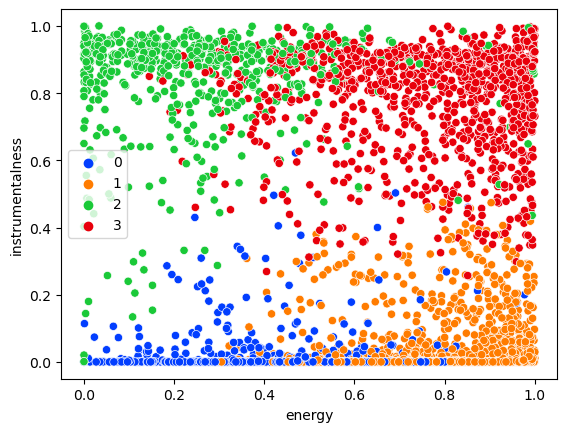

In [94]:
sns.scatterplot(data=df, 
                x="energy",
                y="instrumentalness",
                hue=kmeans.labels_,
                palette="bright")
plt.show()

In [95]:
df["kmeans.labels_"] = kmeans.labels_

In [97]:
np.unique(df['kmeans.labels_'], return_counts=True)

(array([0, 1, 2, 3]), array([1027, 2298,  618, 1057], dtype=int64))

df.to_csv('test_cleaned_kmeans4.csv', index=False)

In [16]:
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
0,Untrue,206826,0,32,Coal Chamber,Chamber Music,0.383,0.9510,0,-3.743,0.1040,0.006070,0.000000,0.2610,0.668,110.584,4.0,industrial,2
1,High Roller,329733,0,41,The Crystal Method,Vegas,0.464,0.5790,5,-9.136,0.0596,0.281000,0.827000,0.0992,0.140,171.752,4.0,breakbeat,1
2,Na Tum Jano Na Hum (ReVibe),136000,0,40,Ashwin Adwani,Na Tum Jano Na Hum (ReVibe),0.611,0.7780,9,-4.803,0.0326,0.094600,0.000005,0.1390,0.285,90.024,4.0,indian,2
3,いじわるなハロー,247040,0,25,Perfume,Cling Cling,0.500,0.9580,0,-1.695,0.0350,0.008170,0.318000,0.7320,0.955,130.059,4.0,j-idol,2
4,Hit The Ceiling,208120,0,0,Audio Bullys,Ego War,0.802,0.6840,1,-8.839,0.1230,0.001810,0.010200,0.2360,0.637,130.022,4.0,breakbeat,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Ich war es,80813,0,17,Germaine Franco,Encanto (Deutscher Original Film-Soundtrack),0.217,0.0754,11,-16.629,0.0327,0.901000,0.914000,0.1350,0.201,142.026,5.0,disney,3
4996,Giahe Vahshi,261500,0,2,Saeed Dehghan;Pari Eskandari;Beatbynajwa,Oryan,0.467,0.7820,10,-8.136,0.0599,0.001810,0.000057,0.0971,0.203,145.059,4.0,iranian,2
4997,Taste - Reaper Remix,258000,0,19,Shiv-R,"Infacted Compilation, Vol. 5",0.524,0.9730,0,-5.214,0.0469,0.000057,0.005170,0.1070,0.840,140.029,4.0,industrial,2
4998,Romove,404506,0,19,Skyforger,Senprusija,0.166,0.9750,2,-3.585,0.1100,0.000032,0.005520,0.0656,0.233,75.005,4.0,black-metal,2


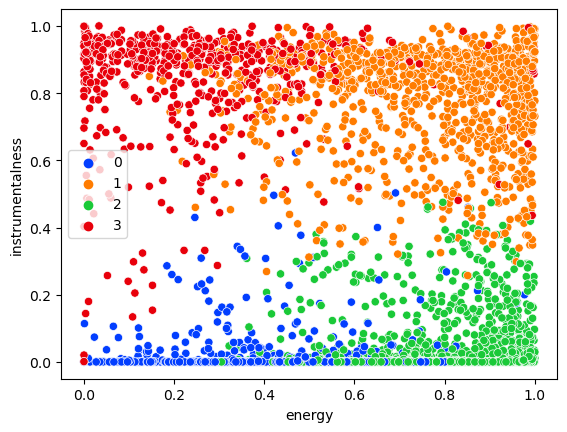

In [17]:
sns.scatterplot(data=df, 
                x="energy",
                y="instrumentalness",
                hue=kmeans.labels_,
                palette="bright")
plt.show()